Epizod 10000: Średnia nagroda z ostatnich 10000 epizodów = -0.1731
Epizod 20000: Średnia nagroda z ostatnich 10000 epizodów = -0.1655
Epizod 30000: Średnia nagroda z ostatnich 10000 epizodów = -0.1567
Epizod 40000: Średnia nagroda z ostatnich 10000 epizodów = -0.1560
Epizod 50000: Średnia nagroda z ostatnich 10000 epizodów = -0.1658
Epizod 60000: Średnia nagroda z ostatnich 10000 epizodów = -0.1669
Epizod 70000: Średnia nagroda z ostatnich 10000 epizodów = -0.1580
Epizod 80000: Średnia nagroda z ostatnich 10000 epizodów = -0.1585
Epizod 90000: Średnia nagroda z ostatnich 10000 epizodów = -0.1581
Epizod 100000: Średnia nagroda z ostatnich 10000 epizodów = -0.1680
Epizod 110000: Średnia nagroda z ostatnich 10000 epizodów = -0.1644
Epizod 120000: Średnia nagroda z ostatnich 10000 epizodów = -0.1487
Epizod 130000: Średnia nagroda z ostatnich 10000 epizodów = -0.1684
Epizod 140000: Średnia nagroda z ostatnich 10000 epizodów = -0.1552
Epizod 150000: Średnia nagroda z ostatnich 10000 epizodów

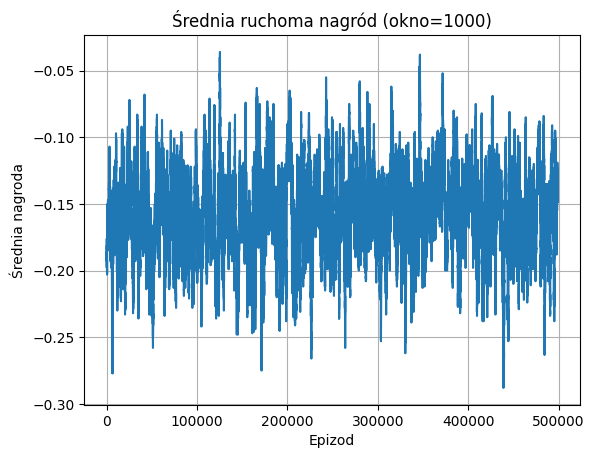

In [4]:
# Lab 4 - Uczenie ze wzmocnieniem z wykorzystaniem Gymnasium
# Wariant: Gotowe środowisko Gymnasium - Blackjack-v1

import gymnasium as gym
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import defaultdict

# 1. Inicjalizacja środowiska
env = gym.make("Blackjack-v1")

# 2. Parametry Q-learningu
episodes = 500000
alpha = 0.1          # współczynnik uczenia
gamma = 0.99         # współczynnik dyskontujący
epsilon = 0.1        # eksploracja

# 3. Inicjalizacja Q-tabeli
q_table = defaultdict(lambda: np.zeros(env.action_space.n))

# 4. Trenowanie agenta
all_rewards = []
interval = 10000  # Co ile epizodów wyświetlać statystyki

for i in range(episodes):
    state, _ = env.reset()
    done = False
    total_reward = 0

    while not done:
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()  # eksploracja
        else:
            action = np.argmax(q_table[state])  # eksploatacja

        next_state, reward, done, truncated, info = env.step(action)

        old_value = q_table[state][action]
        next_max = np.max(q_table[next_state])

        new_value = old_value + alpha * (reward + gamma * next_max - old_value)
        q_table[state][action] = new_value

        state = next_state
        total_reward += reward

    all_rewards.append(total_reward)

    # Pokazanie postępu uczenia co określoną liczbę epizodów
    if (i + 1) % interval == 0:
        recent_avg = np.mean(all_rewards[-interval:])
        print(f"Epizod {i + 1}: Średnia nagroda z ostatnich {interval} epizodów = {recent_avg:.4f}")

# 5. Testowanie agenta
num_test_episodes = 10000
wins = 0
losses = 0
draws = 0

for _ in range(num_test_episodes):
    state, _ = env.reset()
    done = False
    while not done:
        action = np.argmax(q_table[state])
        state, reward, done, truncated, info = env.step(action)

    if reward == 1:
        wins += 1
    elif reward == -1:
        losses += 1
    else:
        draws += 1

# 6. Wyniki
print("\n--- WYNIKI TESTU ---")
print(f"Wygrane: {wins}")
print(f"Przegrane: {losses}")
print(f"Remisy: {draws}")
print(f"Skuteczność: {wins / num_test_episodes * 100:.2f}%")

# 7. Wizualizacja nagród
plt.plot(np.convolve(all_rewards, np.ones(1000)/1000, mode='valid'))
plt.title("Średnia ruchoma nagród (okno=1000)")
plt.xlabel("Epizod")
plt.ylabel("Średnia nagroda")
plt.grid(True)
plt.show()

env.close()

Epizod 10000: Średnia nagroda z ostatnich 10000 epizodów = -0.1562
Epizod 20000: Średnia nagroda z ostatnich 10000 epizodów = -0.1699
Epizod 30000: Średnia nagroda z ostatnich 10000 epizodów = -0.1701
Epizod 40000: Średnia nagroda z ostatnich 10000 epizodów = -0.1577
Epizod 50000: Średnia nagroda z ostatnich 10000 epizodów = -0.1731
Epizod 60000: Średnia nagroda z ostatnich 10000 epizodów = -0.1614
Epizod 70000: Średnia nagroda z ostatnich 10000 epizodów = -0.1378
Epizod 80000: Średnia nagroda z ostatnich 10000 epizodów = -0.1823
Epizod 90000: Średnia nagroda z ostatnich 10000 epizodów = -0.1733
Epizod 100000: Średnia nagroda z ostatnich 10000 epizodów = -0.1577
Epizod 110000: Średnia nagroda z ostatnich 10000 epizodów = -0.1662
Epizod 120000: Średnia nagroda z ostatnich 10000 epizodów = -0.1419
Epizod 130000: Średnia nagroda z ostatnich 10000 epizodów = -0.1608
Epizod 140000: Średnia nagroda z ostatnich 10000 epizodów = -0.1782
Epizod 150000: Średnia nagroda z ostatnich 10000 epizodów

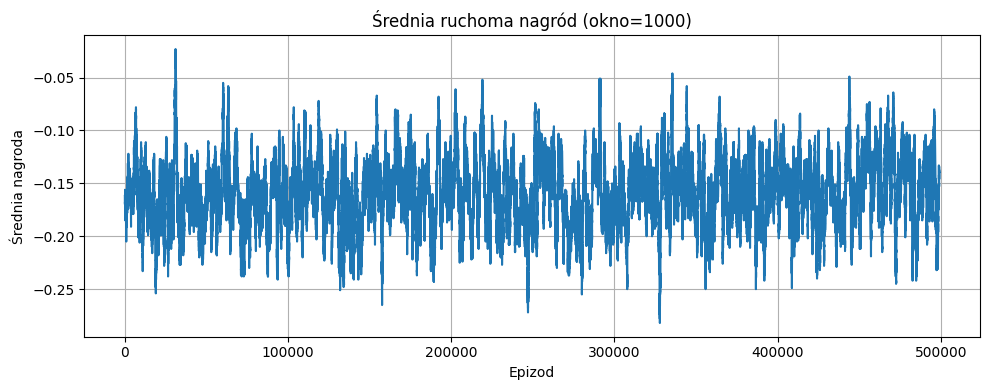

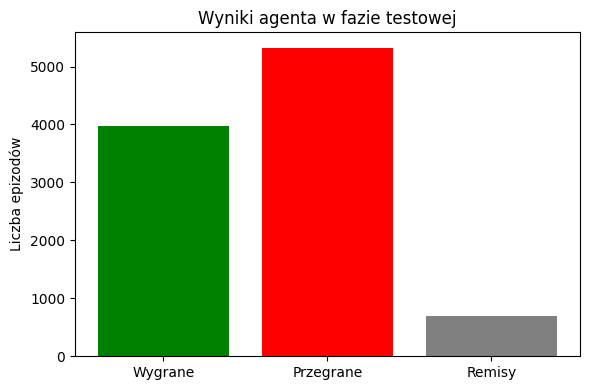

In [5]:
# Lab 4 - Uczenie ze wzmocnieniem z wykorzystaniem Gymnasium
# Wariant: Gotowe środowisko Gymnasium - Blackjack-v1

import gymnasium as gym
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import defaultdict

# 1. Inicjalizacja środowiska
env = gym.make("Blackjack-v1", natural=True)  # Użycie opcji natural zwiększa realizm nagród

# 2. Parametry Q-learningu
episodes = 500000
alpha = 0.1          # współczynnik uczenia
gamma = 0.99         # współczynnik dyskontujący
epsilon = 0.1        # eksploracja

# 3. Inicjalizacja Q-tabeli
q_table = defaultdict(lambda: np.zeros(env.action_space.n))

# 4. Trenowanie agenta
all_rewards = []
interval = 10000  # Co ile epizodów wyświetlać statystyki

for i in range(episodes):
    state, _ = env.reset()
    done = False
    total_reward = 0

    while not done:
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()  # eksploracja
        else:
            action = np.argmax(q_table[state])  # eksploatacja

        next_state, reward, done, truncated, info = env.step(action)

        old_value = q_table[state][action]
        next_max = np.max(q_table[next_state])

        new_value = old_value + alpha * (reward + gamma * next_max - old_value)
        q_table[state][action] = new_value

        state = next_state
        total_reward += reward

    all_rewards.append(total_reward)

    # Pokazanie postępu uczenia co określoną liczbę epizodów
    if (i + 1) % interval == 0:
        recent_avg = np.mean(all_rewards[-interval:])
        print(f"Epizod {i + 1}: Średnia nagroda z ostatnich {interval} epizodów = {recent_avg:.4f}")

# 5. Testowanie agenta
num_test_episodes = 10000
wins = 0
losses = 0
draws = 0

test_rewards = []

for _ in range(num_test_episodes):
    state, _ = env.reset()
    done = False
    total_reward = 0
    while not done:
        action = np.argmax(q_table[state])
        state, reward, done, truncated, info = env.step(action)
        total_reward += reward

    test_rewards.append(total_reward)
    if reward == 1:
        wins += 1
    elif reward == -1:
        losses += 1
    else:
        draws += 1

# 6. Wyniki
print("\n--- WYNIKI TESTU ---")
print(f"Wygrane: {wins}")
print(f"Przegrane: {losses}")
print(f"Remisy: {draws}")
print(f"Skuteczność: {wins / num_test_episodes * 100:.2f}%")

# 7. Wizualizacja nagród z treningu
plt.figure(figsize=(10, 4))
plt.plot(np.convolve(all_rewards, np.ones(1000)/1000, mode='valid'))
plt.title("Średnia ruchoma nagród (okno=1000)")
plt.xlabel("Epizod")
plt.ylabel("Średnia nagroda")
plt.grid(True)
plt.tight_layout()
plt.show()

# 8. Wizualizacja wyników testu
plt.figure(figsize=(6, 4))
labels = ['Wygrane', 'Przegrane', 'Remisy']
values = [wins, losses, draws]
plt.bar(labels, values, color=['green', 'red', 'gray'])
plt.title("Wyniki agenta w fazie testowej")
plt.ylabel("Liczba epizodów")
plt.tight_layout()
plt.show()

env.close()


In [ ]:
import gymnasium as gym
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import defaultdict

# 1. Inicjalizacja środowiska
env = gym.make("MountainCar-v0")

# 2. Parametry Q-learningu
episodes = 50000
alpha = 0.1          # współczynnik uczenia
gamma = 0.99         # współczynnik dyskontujący
epsilon = 0.1        # eksploracja

# 3. Inicjalizacja Q-tabeli
# Stan w MountainCar jest ciągły, więc będziemy dyskretyzować go na przedziały
def discretize_state(state, bins=(18, 14)):
    """Dyskretyzacja stanu w przestrzeni kontynuowalnej (pozycja, prędkość) na dyskretne przedziały"""
    state_bins = [
        np.linspace(-1.2, 0.6, bins[0]),  # Pozycja (x)
        np.linspace(-0.07, 0.07, bins[1])  # Prędkość (v)
    ]
    state_discretized = [
        np.digitize(state[0], state_bins[0]),
        np.digitize(state[1], state_bins[1])
    ]
    return tuple(state_discretized)

q_table = defaultdict(lambda: np.zeros(env.action_space.n))

# 4. Trenowanie agenta
all_rewards = []
interval = 1000  # Co ile epizodów wyświetlać statystyki

for i in range(episodes):
    state, _ = env.reset()
    state = discretize_state(state)
    done = False
    total_reward = 0

    while not done:
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()  # eksploracja
        else:
            action = np.argmax(q_table[state])  # eksploatacja

        next_state, reward, done, _, _ = env.step(action)
        next_state = discretize_state(next_state)

        old_value = q_table[state][action]
        next_max = np.max(q_table[next_state])

        new_value = old_value + alpha * (reward + gamma * next_max - old_value)
        q_table[state][action] = new_value

        state = next_state
        total_reward += reward

    all_rewards.append(total_reward)

    # Pokazanie postępu uczenia co określoną liczbę epizodów
    if (i + 1) % interval == 0:
        recent_avg = np.mean(all_rewards[-interval:])
        print(f"Epizod {i + 1}: Średnia nagroda z ostatnich {interval} epizodów = {recent_avg:.4f}")

# 5. Testowanie agenta
num_test_episodes = 1000
wins = 0
test_rewards = []

for _ in range(num_test_episodes):
    state, _ = env.reset()
    state = discretize_state(state)
    done = False
    total_reward = 0

    while not done:
        action = np.argmax(q_table[state])
        state, reward, done, _, _ = env.step(action)
        state = discretize_state(state)
        total_reward += reward

    test_rewards.append(total_reward)

# 6. Wyniki
print("\n--- WYNIKI TESTU ---")
print(f"Średnia nagroda: {np.mean(test_rewards)}")

# 7. Wizualizacja nagród
plt.plot(np.convolve(all_rewards, np.ones(1000)/1000, mode='valid'))
plt.title("Średnia ruchoma nagród (okno=1000)")
plt.xlabel("Epizod")
plt.ylabel("Średnia nagroda")
plt.grid(True)
plt.show()

env.close()


Epizod 1000: Średnia nagroda z ostatnich 1000 epizodów = -390.4400
Epizod 2000: Średnia nagroda z ostatnich 1000 epizodów = -236.4210
Epizod 3000: Średnia nagroda z ostatnich 1000 epizodów = -217.0080
Epizod 4000: Średnia nagroda z ostatnich 1000 epizodów = -241.2260
Epizod 5000: Średnia nagroda z ostatnich 1000 epizodów = -233.2710
Epizod 6000: Średnia nagroda z ostatnich 1000 epizodów = -216.3130
Epizod 7000: Średnia nagroda z ostatnich 1000 epizodów = -213.1950
Epizod 8000: Średnia nagroda z ostatnich 1000 epizodów = -203.1520
Epizod 9000: Średnia nagroda z ostatnich 1000 epizodów = -224.9400
Epizod 10000: Średnia nagroda z ostatnich 1000 epizodów = -224.8930
Epizod 11000: Średnia nagroda z ostatnich 1000 epizodów = -221.5680
Epizod 12000: Średnia nagroda z ostatnich 1000 epizodów = -222.6960
Epizod 13000: Średnia nagroda z ostatnich 1000 epizodów = -233.1110
Epizod 14000: Średnia nagroda z ostatnich 1000 epizodów = -253.8100
Epizod 15000: Średnia nagroda z ostatnich 1000 epizodów =